<a href="https://colab.research.google.com/github/Jwalitsolanki/Oil-and-Gas_ML/blob/master/Relative_permeability_curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [ ]:
#from staedy state lab analysis
data = [[0, 21.20, 0.00], [0.2, 18.00, 0.50], [0.4, 10.60, 1.40], [0.6, 3.00, 2.90], [0.8, 0.40, 6.50], [1.0, 0.00, 24.30]]
df = pd.DataFrame(data, columns = ['Sw', 'qo', 'qw'])
df

,Sw,qo,qw
0,0.0,21.2,0.0
1,0.2,18.0,0.5
2,0.4,10.6,1.4
3,0.6,3.0,2.9
4,0.8,0.4,6.5
5,1.0,0.0,24.3


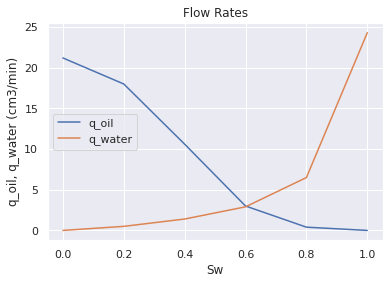

In [ ]:
p1 = plt.plot(df['Sw'], df['qo'])
p2 = plt.plot(df['Sw'], df['qw'])
plt.xlabel("Sw")
plt.ylabel("q_oil, q_water (cm3/min)")
plt.legend((p1[0], p2[0]), ('q_oil', 'q_water'))
plt.title("Flow Rates")
plt.show()

In [ ]:
df['kr_o'] = df['qo'] / df['qo'][0]
df['kr_w'] = df['qw'] / df['qw'][5]

In [ ]:
df

,Sw,qo,qw,kr_o,kr_w
0,0.0,21.2,0.0,1.000000,0.000000
1,0.2,18.0,0.5,0.849057,0.020576
2,0.4,10.6,1.4,0.500000,0.057613
3,0.6,3.0,2.9,0.141509,0.119342
4,0.8,0.4,6.5,0.018868,0.267490
5,1.0,0.0,24.3,0.000000,1.000000


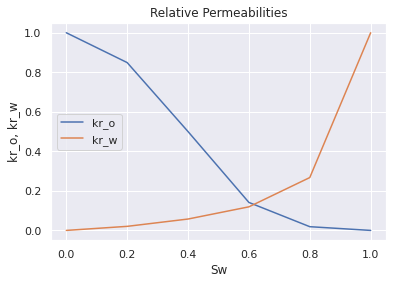

In [ ]:
p1 = plt.plot(df['Sw'], df['kr_o'])
p2 = plt.plot(df['Sw'], df['kr_w'])
plt.xlabel("Sw")
plt.ylabel("kr_o, kr_w")
plt.legend((p1[0], p2[0]), ('kr_o', 'kr_w'))
plt.title("Relative Permeabilities")
plt.show()

In [ ]:
#phase permeability
u_oil = 5 #cp
u_water = 1.2 #cp
dP = -2.5
core_area = 5 #cm2
length_core  = 12 #cm

In [ ]:
df['k_o (phase k)'] = -(df['qo'] * u_oil / core_area) / (dP / length_core)
df['k_w (phase k)'] = -(df['qw'] * u_water / core_area) / (dP / length_core)

In [ ]:
df

,Sw,qo,qw,kr_o,kr_w,k_o,k_w,k_o (phase k),k_w (phase k)
0,0.0,21.2,0.0,1.000000,0.000000,101.76,0.0000,101.76,0.0000
1,0.2,18.0,0.5,0.849057,0.020576,86.40,0.5760,86.40,0.5760
2,0.4,10.6,1.4,0.500000,0.057613,50.88,1.6128,50.88,1.6128
3,0.6,3.0,2.9,0.141509,0.119342,14.40,3.3408,14.40,3.3408
4,0.8,0.4,6.5,0.018868,0.267490,1.92,7.4880,1.92,7.4880
5,1.0,0.0,24.3,0.000000,1.000000,0.00,27.9936,0.00,27.9936


Text(0.5, 1.0, 'Phase Permeabilities')

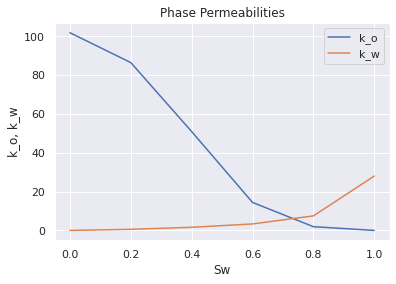

In [ ]:
p1 = plt.plot(df['Sw'], df['k_o (phase k)'])
p2 = plt.plot(df['Sw'], df['k_w (phase k)'])
plt.xlabel("Sw")
plt.ylabel("k_o, k_w")
plt.legend((p1[0], p2[0]), ('k_o', 'k_w'))
plt.title("Phase Permeabilities")

# One with relperm model
Corey 2 phase model

In [ ]:
Sw = np.linspace(0,1,100)

Swirr = 0.15  #irreducible water saturation 

Swn = (Sw - Swirr)/(1-Swirr)

Krw = Swn**4

Kro = ((1 - Swn)**2)*(1 - Swn**2)

Text(0.5, 1.0, 'Relative Permeabilities')

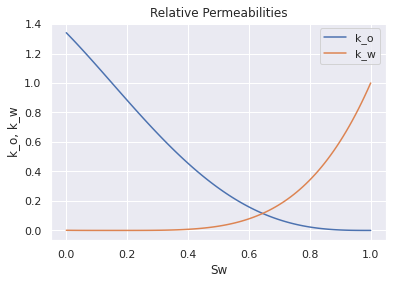

In [ ]:
p1 = plt.plot(Sw, Kro)
p2 = plt.plot(Sw, Krw)
plt.xlabel("Sw")
plt.ylabel("k_o, k_w")
plt.legend((p1[0], p2[0]), ('k_o', 'k_w'))
plt.title("Relative Permeabilities")